## Metropolis for Ensemble Refinement

In [1]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import scipy.stats as stt
from scipy.optimize import curve_fit
from scipy.optimize import minimize
import numpy as np
import time
import os

### trash

### try with uniform prior over the simplex and different numbers of frames

In [110]:
# DIRICHLET GENERATOR NUMPY WITH ALPHA=1 IS MUCH FASTER 
def simplex_unif(N, M):
    a = np.random.rand(M, N - 1)
    a = np.sort(a, axis=1)
    a = np.concatenate((np.array([np.zeros(M)]).T, a, np.array([np.ones(M)]).T), axis=1)
    b = np.diff(a, n=1, axis=1)
    return b

In [49]:
userdoc=os.path.join(os.path.expanduser("~"),'1_project/initial_data')
#weights=np.loadtxt(os.path.join(userdoc,'weightsADE'),delimiter=',')
g=np.loadtxt(os.path.join(userdoc,'sugar_couplADE'),delimiter=',')#[:,0] # which are time-correlated

M=50000
#N=500
Ns=[500,750,1000,1250,1500,1750,2000]#,2500,3000,3500,4000,4500,5000]#,6000,7000,8000,9000,10000]
nframes=20001
nobs=7

av=np.zeros((nobs,len(Ns),3))
av2=np.zeros((nobs,len(Ns),3))

j=0
for N in Ns:
    M=N*100
    gener=np.random.dirichlet(np.ones(N)*5,size=M)
    #gener=simplexunif(N,M)

    # 1. CHOOSE RANDOMLY
    for i in range(nobs):
        gg=np.random.choice(g[:,i],size=N,replace=False) # choose randomly
        #gg=g[:N,i] # choose the values up to N
        #l=np.int(nframes/N)
        #gg=g[0:(l*N):l,i] # choose the values every l
    
        a=np.matmul(gener,gg) # the average of quantity gg for each different ensemble
        av[i,j,0]=np.sum(a)/M # the average over ensembles of the average quantity of each ensemble (unif. distrib.)
        av2[i,j,0]=np.sum(a**2)/M

    # 2. TAKE THE FIRST N ELEMENTS
    for i in range(nobs):
        #gg=np.random.choice(g[:,i],size=N,replace=False) # choose randomly
        gg=g[:N,i] # choose the values up to N
        #l=np.int(nframes/N)
        #gg=g[0:(l*N):l,i] # choose the values every l
    
        a=np.matmul(gener,gg) # the average of quantity gg for each different ensemble
        av[i,j,1]=np.sum(a)/M # the average over ensembles of the average quantity of each ensemble (unif. distrib.)
        av2[i,j,1]=np.sum(a**2)/M
    
    # 3. TAKE WITH STRIDE
    for i in range(nobs):
        #gg=np.random.choice(g[:,i],size=N,replace=False) # choose randomly
        #gg=g[:N,i] # choose the values up to N
        l=np.int(nframes/N)
        gg=g[0:(l*N):l,i] # choose the values every l
    
        a=np.matmul(gener,gg) # the average of quantity gg for each different ensemble
        #print(a)
        av[i,j,2]=np.sum(a)/M # the average over ensembles of the average quantity of each ensemble (unif. distrib.)
        av2[i,j,2]=np.sum(a**2)/M
    
    j+=1



3.114260227097418
0.020316612902520313


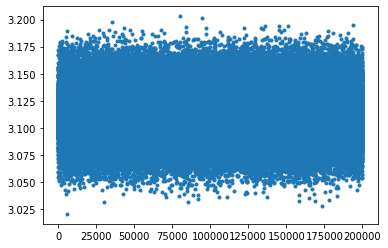

In [50]:
plt.plot(a,'.')
#plt.xlim([0,1000])
mean_a=np.mean(a)
std_a=np.std(a)
print(mean_a)
print(std_a)

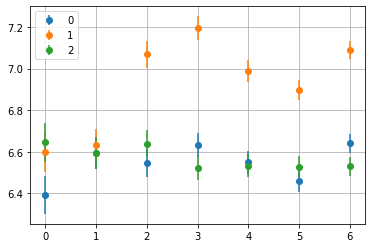

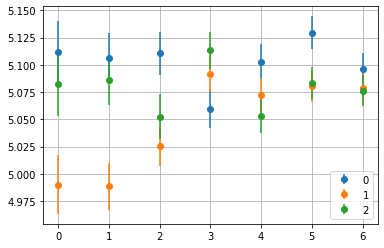

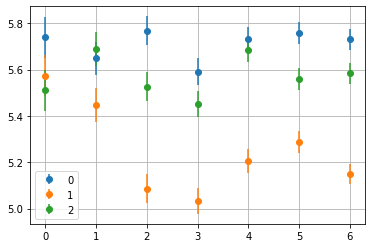

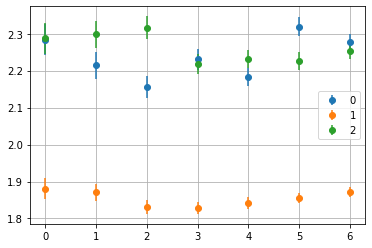

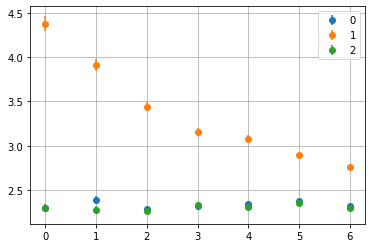

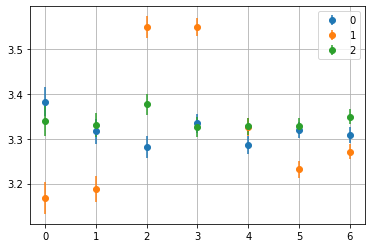

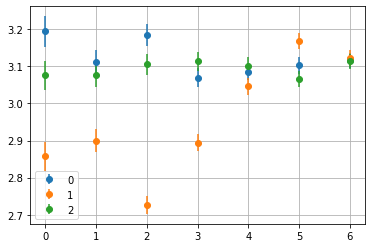

In [51]:
#print(av)
#print(av2)

std=np.sqrt(av2-av**2)

#print(std)
for i in range(nobs):
    plt.figure()
    for j in range(3):
        #plt.plot(av2[i,:,j],'o',label=j)
        #plt.plot(av[i,:,j]**2,'.',label=j)
        plt.errorbar(np.arange(len(Ns)),av[i,:,j],std[i,:,j],fmt='o',label=j)
    plt.legend()
    plt.grid()
#plt.yscale('log')
#plt.grid()

In [52]:
i=0
print(std[:,i+5,:]/std[:,i,:])
print(np.sqrt(Ns[i]/Ns[i+5]))

[[0.53819004 0.52057629 0.53326532]
 [0.53241405 0.5390145  0.504439  ]
 [0.53959041 0.53122902 0.53588655]
 [0.58944862 0.50511701 0.55734856]
 [0.58466077 0.39170872 0.53819325]
 [0.54399329 0.51896312 0.55258865]
 [0.53781045 0.58868046 0.54516937]]
0.5345224838248488


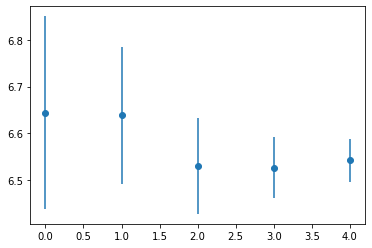

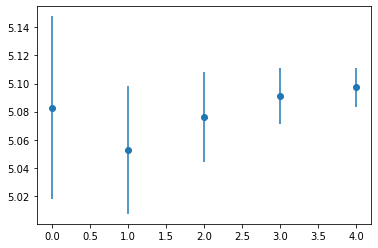

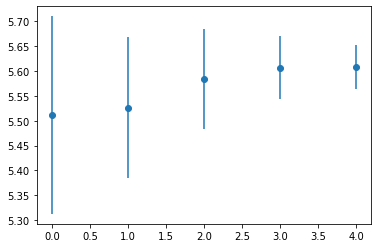

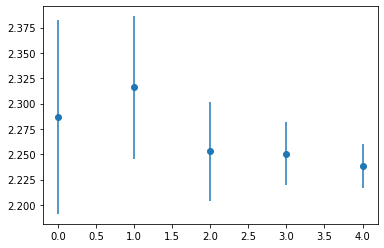

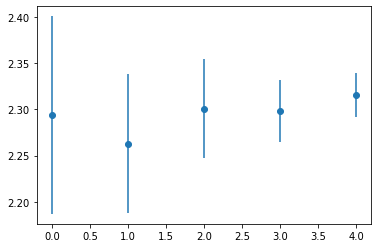

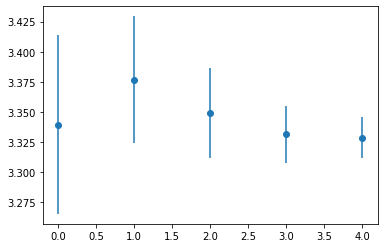

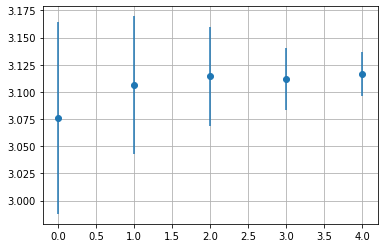

In [56]:
#print(av)
#print(av2)

std=np.sqrt(av2-av**2)

#print(std)
for i in range(nobs):
    plt.figure()
    plt.errorbar(np.arange(len(Ns)),av[i,:],std[i,:],fmt='o')
#plt.yscale('log')
plt.grid()

### example

In [127]:
def g(x):
    # indicator function y
    #y=np.zeros(np.shape(x)[0])
    #y[np.where((x>-1) & (x<1))]=1
    #return y
    #return 3*x
    #return np.cos(x)-np.sin(x)+x**3
    return np.cos(2*x)+np.sin(2.21*x)*x**2
    #return np.cos(10*x)*(x)**3+np.sin(5*x)*x**3#-np.cos(2*x)+(x-1)**3

Text(0.5, 1.0, 'function')

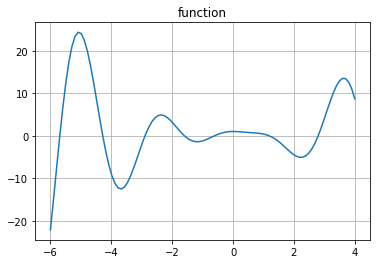

In [162]:
plt.figure()
x=np.linspace(-6,4,100)
y=g(x)
plt.plot(x,y)
plt.grid()
plt.title('function')

In [163]:
xs=[]
gs=[]

Ns=[10,20,50,100,200,500,1000]
M=100000
av=[]#np.zeros(N)
av2=[]#np.zeros(N)

for N in Ns:
    #print(i)
    ##### if append:
    #xs.append(np.random.rand()*2-1)
    #gs.append(g(xs[-1]))

    #### elif g(xs):
    xs=np.random.rand(N)*5-1
    gs=g(xs)

    #### elif g random:
    #gs=np.random.rand(N)*10

    MC=np.random.dirichlet(np.ones(len(xs))/len(xs),size=M)
        
    a=np.matmul(MC,gs) # the average of quantity gs for each different ensemble
    #print(np.shape(a))
    av.append(np.sum(a)/M) # the average over ensembles of the average quantity of each ensemble (unif. distrib.)
    av2.append(np.sum(a**2)/M)


KeyboardInterrupt: 

In [171]:
N=50
M=2000

xs=np.random.rand(N)*5-1
gs=g(xs)
MC=np.random.dirichlet(np.ones(len(xs))/len(xs),size=M)
a=np.matmul(MC,gs)

[-0.08889981  2.70599456 -1.43970882 ... -4.37556166  0.50795387
  0.16993829]


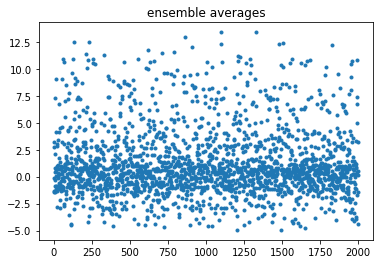

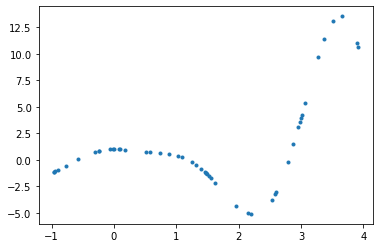

In [172]:
print(a)
plt.plot(a,'.')
plt.title('ensemble averages')
#plt.xlim([0,300])

plt.figure()
plt.plot(xs,gs,'.')

0.019259735054713564

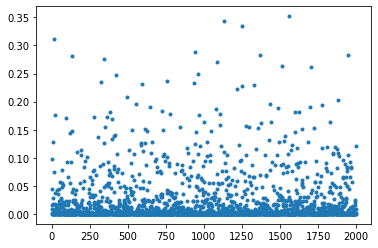

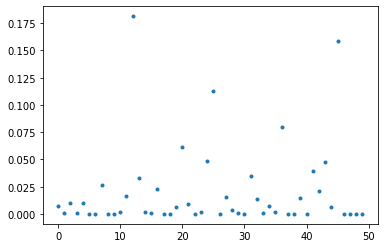

In [166]:
plt.plot(MC[:,np.random.randint(N)],'.')

plt.figure()
for i in range(1):
    plt.plot(MC[np.random.randint(M),:],'.',label=i)
#plt.legend()
#plt.yscale('log')
#plt.ylim([1e-3,1])

np.mean(MC[:,np.random.randint(N)])

In [145]:
av=np.mean(a)
av2=np.mean(a**2)
var=av2-av**2

print(av)
print('std: ',np.sqrt(var))

1.476352421716888
std:  0.2575120668306342


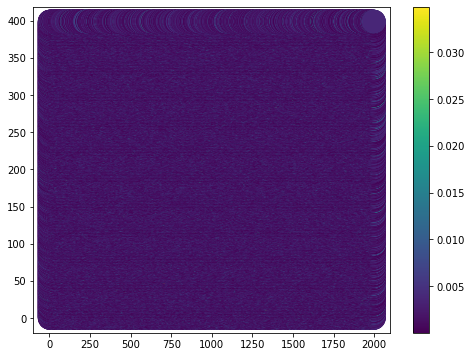

In [146]:

x, y = np.meshgrid(np.arange(np.shape(MC)[0]),np.arange(np.shape(MC)[1]))


plt.figure(0,figsize=(8,6))

plt.scatter(x,y,c=MC,s=500)#,cmap='Reds',marker='s')#,norm=colors.LogNorm())#vmin=1,vmax=3))#,norm=colors.Normalize(vmin=np.min(av_data[:,:,nvar]),vmax=10))
plt.colorbar()

In [61]:
N=500
Ms=np.arange(1000,100000,100)#[1000,2000,3000,5000,8000,10000]
av=[]
av2=[]
xs=np.random.rand(N)*2-1
gs=g(xs)

for M in Ms:   
    MC=np.random.dirichlet(np.ones(len(xs)),size=M)
        
    a=np.matmul(MC,gs) # the average of quantity gs for each different ensemble
    #print(np.shape(a))
    av.append(np.sum(a)/M) # the average over ensembles of the average quantity of each ensemble (unif. distrib.)
    av2.append(np.sum(a**2)/M)

KeyboardInterrupt: 

In [65]:
av=np.array(av)
av2=np.array(av2)

<ErrorbarContainer object of 3 artists>

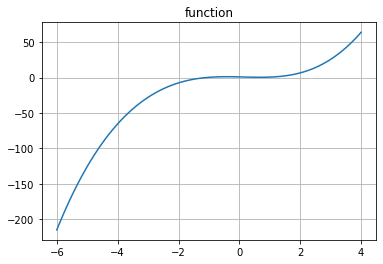

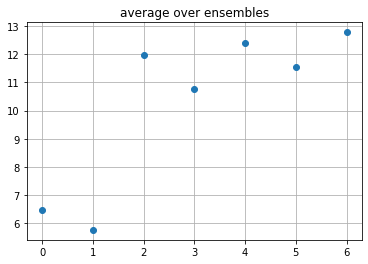

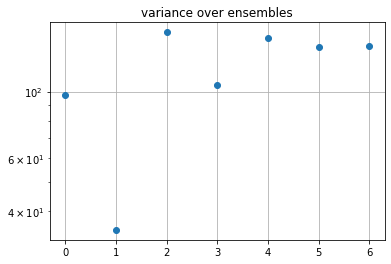

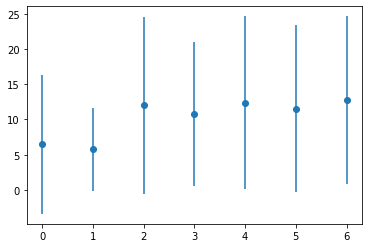

In [67]:
plt.figure()
x=np.linspace(-6,4,100)
y=g(x)
plt.plot(x,y)
plt.grid()
plt.title('function')

plt.figure()
plt.plot(av,'o')
plt.grid()
plt.title('average over ensembles')
#plt.plot(av2-av**2,'.')

plt.figure()
std=np.sqrt(av2-av**2)
plt.plot(std**2,'o')
plt.yscale('log')
#plt.xscale('log')
plt.title('variance over ensembles')
plt.grid()

plt.figure()
plt.errorbar(np.arange(len(av)),av,std,fmt='o')

<ErrorbarContainer object of 3 artists>

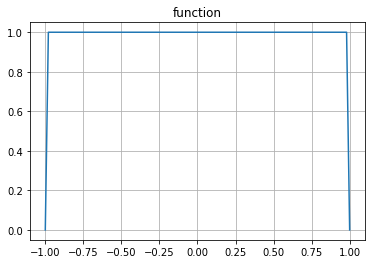

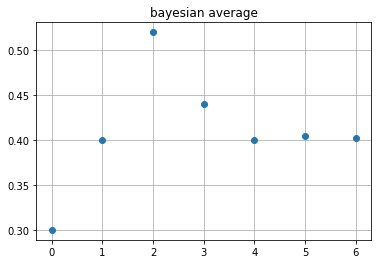

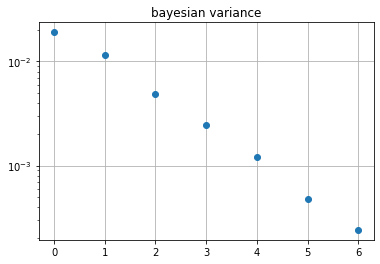

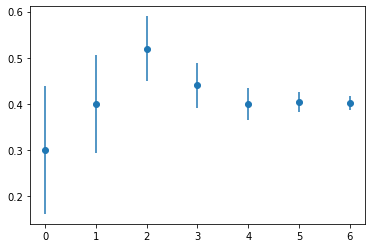

In [40]:
plt.figure()
x=np.linspace(-1,1,100)
y=g(x)
plt.plot(x,y)
plt.grid()
plt.title('function')

plt.figure()
plt.plot(av,'o')
plt.grid()
plt.title('bayesian average')
#plt.plot(av2-av**2,'.')

plt.figure()
std=np.sqrt(av2-av**2)
plt.plot(std**2,'o')
plt.yscale('log')
#plt.xscale('log')
plt.title('bayesian variance')
plt.grid()

plt.figure()
plt.errorbar(np.arange(len(av)),av,std,fmt='o')

In [41]:
print(std[499]/std[250])
print(1/np.sqrt(2))

IndexError: index 499 is out of bounds for axis 0 with size 7

In [6]:
alpha=1
beta=2
gradient=True

In [14]:
nblocks=1
nblocks_test=1
nobs=7
nobs_test=1
nframes=np.shape(weightsADE)[0]

test_block=np.sort(np.random.choice(nblocks,nblocks_test,False)) # without replacement
test_obs=np.sort(np.random.choice(nobs,nobs_test,False)) # without replacement and without sort
#test_obs=np.array([2])
print('observables in test set: ', test_obs)

# build lambdamap and lambdamap2 from: the n. of systems, the n. of observables, the test observables
# in this way you have the corresponding lambdas for the test set (1, 2)
lambdamap,lambdamap2=buildlambdamap(np.shape(parmap)[0],nobs,test_obs)

train_wADE,train_gexpADE,train_gADE,train_fADE,test2_wADE,test1_gexpADE,test1_gADE,test2_gADE,test2_fADE=select_traintest(weightsADE,trajADE,sugar_couplADE,exp_sugarADE,test_block,test_obs,nframes,if_only=if_only)
train_wCYT,train_gexpCYT,train_gCYT,train_fCYT,test2_wCYT,test1_gexpCYT,test1_gCYT,test2_gCYT,test2_fCYT=select_traintest(weightsCYT,trajCYT,sugar_couplCYT,exp_sugarCYT,test_block,test_obs,nframes,if_only=if_only)


observables in test set:  [3]


### alphabeta_lossf minimization over the whole dataset for the estimated optimal alpha,beta

In [16]:
parlambdas0=+np.random.rand(nff+14)
print(parlambdas0)
mini=minimize(alphabeta_lossf, parlambdas0, method="BFGS",jac=True,options={'disp': True})

[0.17338592 0.31929572 0.5594204  0.0839478  0.32488285 0.52503978
 0.79637357 0.04359921 0.06484966 0.86203811 0.49611788 0.97541006
 0.94867255 0.38789564 0.61411952 0.00692767 0.10315882 0.27403046
 0.20983808 0.49467784 0.61473521 0.72903042 0.73512402 0.94315055
 0.60686049 0.0317982  0.3511913  0.66057956 0.36723506 0.03563004
 0.5603816  0.38764746 0.30681227 0.41317094 0.7040586  0.66746394]


IndexError: boolean index did not match indexed array along dimension 0; dimension is 12 but corresponding boolean dimension is 14

In [286]:
par0=np.random.uniform(0,1,nff)
print('starting point: ',par0)

# minimization
start=time.time()
mini=minimize(beta_lossf, par0, method="BFGS",jac=True)#,options={'gtol': 1e-20, 'disp': True})#tol=10**(-30))#,bounds=bounds)
print("Minimization time:",time.time()-start)
print(mini)

minlossf=mini.fun
cov=mini.hess_inv
minphis=mini.x


starting point:  [0.9738445  0.87398077 0.66018286 0.68159988 0.59787227 0.24446746
 0.80186282 0.93844775 0.28981092 0.93437572 0.18833125 0.96401218
 0.56778428 0.8415859  0.5587639  0.89084125 0.80740326 0.45125684
 0.52219584 0.91496779 0.54260272 0.42511981 0.95690857 0.36006811]
Minimization time: 6.391960859298706
      fun: 1.4302651250802714
 hess_inv: array([[ 5.49461115e+01,  1.55838386e+01,  4.15889131e+01,
        -4.00877160e+01, -3.56968659e+01, -1.65720937e+01,
         7.29635069e+02,  3.25850373e+02,  5.39866198e+02,
        -5.16090617e+02, -7.22711348e+01, -2.30637857e+02,
         9.50206418e+00, -5.67447159e+00,  1.33319960e+00,
        -4.69383294e+00, -4.98581722e+00,  6.77063667e+00,
        -3.49344952e+01, -1.88222820e+01, -2.59005286e+01,
         3.14041799e+01, -3.14066614e+01,  3.14545941e+01],
       [ 1.55838386e+01,  1.88837641e+01,  9.33232155e+00,
        -2.28454958e+01, -1.45487192e+01, -3.85544393e+00,
         3.48276529e+02,  1.61574859e+02,  2.

### point of minimum, eigenvalues and eigenvectors
- compute the eigenvalues and eigenvectors of the covariance matrix (inverse hessian in the point of minimum, from the whole data set)
- look at the numerical round-off error in the covariance matrix (which must be symmetric), needed for using it in the multivariate gaussian, correct the error by symmetrizing it
- compare the value of the point of minimum with the one coming from bootstrap computation (use as errors the sqrt of the diagonal elements; for bootstrap data you can use this or the std from bootstrap)
- compare the covariance matrix with the average covariance matrix from the bootstrap computation (its eigenvectors and variances, i.e. diagonal elements)


In [237]:
eigvaltot,eigvectot=np.linalg.eigh(cov)
whole_std=np.sqrt(np.diag(cov))
print(eigvaltot)
diff=cov-cov.T

a=np.where(diff==np.max(diff))
print('max. numerical error in cells: ',a)
print(cov[a[0],a[1]])
print(cov[a[1],a[0]])

goodcov=(cov+cov.T)/2
phis=np.random.multivariate_normal(minphis,goodcov,size=1)
print(phis)

[7.23378917e-03 4.98078918e-02 6.70753023e-02 1.46819450e-01
 2.18145037e-01 6.16613755e-01 1.14200497e+00 2.72857434e+00
 4.19805595e+00 7.90371908e+00 1.17241012e+01 1.32088701e+01
 1.82818668e+01 2.53660414e+01 3.45132056e+01 5.79178846e+01
 5.94783449e+01 9.20555229e+01 1.93773738e+02 3.78275356e+02
 5.48834837e+02 4.20781623e+03 6.41863614e+03 5.42810671e+05]
max. numerical error in cells:  (array([6]), array([18]))
[-592.83118425]
[-592.83749044]
[[   4.91560072   -1.12370264    4.13695179   -0.61708416  -11.73632427
     1.64222326 -283.98476303 -146.98439957 -196.51488122  237.92107022
    57.30574051   90.28969928    7.10736345    1.21171745    1.47443005
    -9.86200292    4.42202987  -11.19302288  -67.68393728   15.19525794
   -60.27674812    2.36010059  -20.95232759  -10.471374  ]]


(array([7]), array([6]))
-2403101.5220467034
-2403102.3552063955


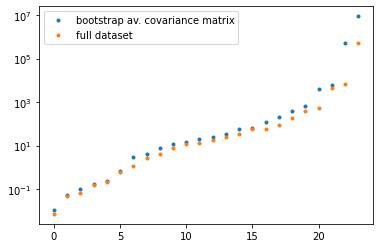

In [12]:
bootstrdoc=os.path.join(os.path.expanduser('~'),'1_project/data_FFF/bootstrap2')
av_covs=np.loadtxt(os.path.join(bootstrdoc,"av_covs"),delimiter=',')

print(np.where((av_covs-av_covs.T)==np.max(av_covs-av_covs.T)))
diff=av_covs-av_covs.T
print(av_covs[7,6])
print(av_covs[6,7])
eigval,eigvec=np.linalg.eigh(av_covs)

plt.plot(eigval,'.',label='bootstrap av. covariance matrix')
plt.plot(eigvaltot,'.',label='full dataset')
plt.yscale('log')
plt.legend()

#phis=np.random.multivariate_normal(minphis,av_covs,size=1)
#print(phis)

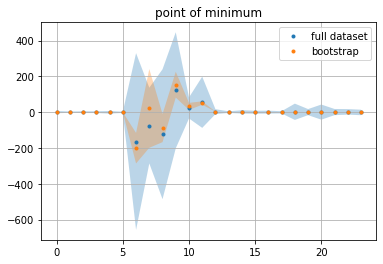

In [26]:
phis=np.loadtxt(os.path.join(bootstrdoc,"minpars"),delimiter=',')
av_phis=np.mean(phis,axis=0)
std_phis=np.std(phis,axis=0)
nff=len(av_phis)

plt.title('point of minimum')
plt.plot(minphis,'.',label='full dataset')
plt.fill_between(np.arange(nff),minphis-np.sqrt(np.diag(cov)),minphis+np.sqrt(np.diag(cov)),alpha=0.3)
plt.plot(av_phis,'.',label='bootstrap')
plt.fill_between(np.arange(nff),av_phis-std_phis,av_phis+std_phis,alpha=0.3)
#plt.ylim([-5,5])#[3/2*np.min(minphis),3/2*np.max(minphis)])
plt.grid()
plt.legend()


### Metropolis:
- trial function: the proposal move, a uniform distribution for the parameters shift in $(-\delta,+\delta)^{nff}$; if not if_equal, do a suitable choice for $\delta$, by taking it as a fraction frac of the standard deviations (sqrt diagonal elements of the inverse hessian in the point of minimum; hypothesis it work well even far from the global minimum)
- sampling function: Metropolis algorithm
    - input: nsteps, delta (how to propose the move), z0 (how to do initialization: the point of min. + a random n. from the multivariate gaussian times z0)

In [246]:
# uniform distribution [-delta,+delta] or sth else?
def trial(phi,delta,if_equal=True,frac=0.1):
    if not if_equal:
        delta=frac*whole_std
    return phi+(np.random.rand()*2-1)*delta
    

In [18]:
print(minphis)
trial(minphis,delta=0.1)

[ 3.80526685e-01  2.73203209e-01  1.60878569e-01  2.01880679e-01
 -6.69586543e-01 -7.02404324e-01 -1.63976600e+02 -7.48197165e+01
 -1.23105364e+02  1.22438673e+02  2.37310808e+01  5.53936152e+01
  2.95301449e+00  3.20173778e-01  1.54646401e+00 -2.73602996e-01
  4.01001001e-01 -6.88432663e-01  2.25877699e+00  4.04889521e-01
  4.57931683e-01  6.88077201e-01  1.77918085e+00 -1.40838846e+00]


array([   0.47314459,    0.36582112,    0.25349648,    0.29449859,
         -0.57696864,   -0.60978642, -163.88398165,  -74.72709861,
       -123.01274604,  122.53129096,   23.82369866,   55.48623313,
          3.0456324 ,    0.41279169,    1.63908192,   -0.18098509,
          0.49361891,   -0.59581476,    2.3513949 ,    0.49750743,
          0.55054959,    0.78069511,    1.87179876,   -1.31577055])

In [19]:
phi=av_phis+std_phis*np.random.multivariate_normal(minphis,goodcov,size=1)[0,:]
print(phi)

[-4.22686319e-02  3.12482194e-01 -1.77548711e-01  4.21627314e-01
 -2.78158298e-01 -6.29058970e-01 -5.19029406e+04 -5.52958988e+04
 -3.50154434e+04  2.76729211e+04  8.64838673e+02  1.68030215e+03
  3.81035657e+00  4.87250878e-01  1.54849609e+00 -8.43099284e-01
  5.02199023e-01 -8.67646803e-01 -2.77850018e-01  2.39156706e+00
 -2.30369863e+00  2.65985550e-01  1.79331139e+00 -1.96621391e+00]


In [247]:
def sampling(delta=0.1,nsteps=100,z0=1):

    traj=[]
    time=[]
    avalpha=0
    lossfs=[]

    phi=minphis+np.random.multivariate_normal(minphis,goodcov,size=1)[0,:]*z0

    traj.append(phi)
    time.append(0)
    lossf=beta_lossf(phi)[0]
    lossfs.append(lossf)

    for istep in range(nsteps):
        phitry=trial(phi,if_equal=True,delta=0.1)
        lossf_try=+beta_lossf(phitry)[0]
        #print(lossf_try)
        alpha=np.exp(lossf-lossf_try)
        if alpha>1: alpha=1
        if alpha>np.random.rand():
            avalpha+=1
            phi=+phitry
            lossf=+lossf_try

        traj.append(phi)
        time.append(istep+1)
        lossfs.append(lossf)

    avalpha=avalpha/nsteps
    

    return np.array(time),np.array(traj),avalpha,lossfs

In [292]:
time,traj,avalpha,lossf=sampling(nsteps=2000,z0=1)

### analyze the results of Metropolis sampling

In [293]:
print(avalpha)

0.8735


min. of the loss f:  1.4302651250802714


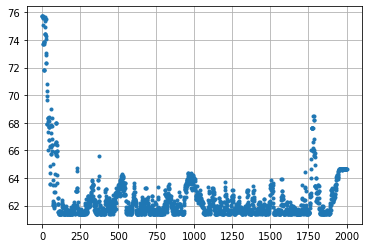

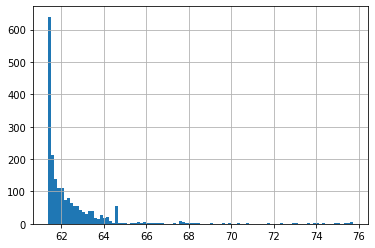

In [294]:
print('min. of the loss f: ',minlossf)

plt.plot(time,lossf,'.')
plt.grid()

plt.figure()
hist,bins,_=plt.hist(lossf,bins=100)
plt.grid()

In [259]:
# Define the Gaussian function
def Gauss(x, A, B, mu):
    y = A*np.exp(-1/(2*B)*(x-mu)**2)
    return y

[8.36585878e+01 3.51918859e-02 5.19103871e+00]
[[ 5.82390129e+00 -3.26639660e-03  3.51119243e-09]
 [-3.26639660e-03  5.49597905e-06 -2.90555146e-12]
 [ 3.51119243e-09 -2.90555146e-12  3.90440806e-05]]


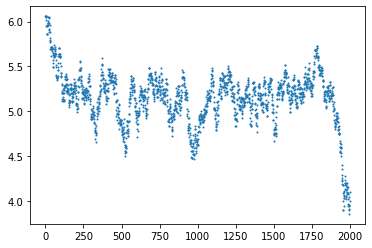

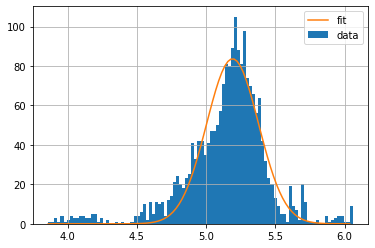

expected values (from minimization):
0.2018385465966195
0.1838611088802979
6.22739863714727


In [295]:
i=3
plt.plot(time,traj[:,i],'.',markersize=2)

plt.figure()
hist,bins,_=plt.hist(traj[:,i],bins=100,label='data')

parameters,covariance=curve_fit(Gauss, bins[:-1],hist)
print(parameters)
print(covariance)
#parameters,covariance=curve_fit(Gauss,x,y)
  
fit_A = parameters[0]
fit_B = parameters[1]
fit_C = parameters[2]
  
fit_y = Gauss(bins[:-1], fit_A, fit_B, fit_C)
#plt.plot(bins[:-1], hist, '.', label='data')
plt.plot(bins[:-1], fit_y, '-', label='fit')
plt.legend()
plt.grid()
plt.show()

print('expected values (from minimization):')
print(minphis[i])
print(av_phis[i])

print(np.sqrt(np.diag(cov))[i])

### Ornstein-Uhlenbeck process

1. generate a Gaussian (Ornstein-Uhlenbeck) process

In [173]:
mu=3
gamma=1
alpha=2

dt=1e-4

x0=0
xs=[]

for i in range(1000000):
    dx=alpha*(mu-x0)*dt+np.sqrt(2*gamma*dt)*np.random.normal()
    x0+=dx
    xs.append(x0)

3.092073473685091
0.7561224890077565


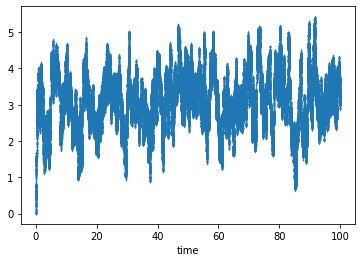

In [174]:
plt.plot(dt*np.arange(len(xs)),xs,'.',markersize=0.5)
plt.xlabel('time')
#plt.xlim([40,50])

GP_av=np.mean(xs)
GP_std=np.std(xs)

print(GP_av)
print(GP_std)

2. compute the autocorrelation function and the typical decorrelation time $\tau$

In [115]:
red_xs=xs[::1000]
corr=np.correlate(red_xs,red_xs,'full')
print(corr)
#num=np.arange(1,len(red_xs)+1)
num=np.concatenate((np.arange(1,len(red_xs)+1),np.arange(1,len(red_xs))[::-1]))
print(num)
corr=corr/num

[0.02329685 0.42080052 2.67927248 ... 2.67927248 0.42080052 0.02329685]
[1 2 3 ... 3 2 1]


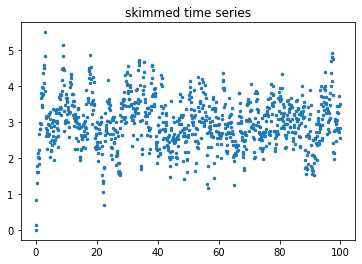

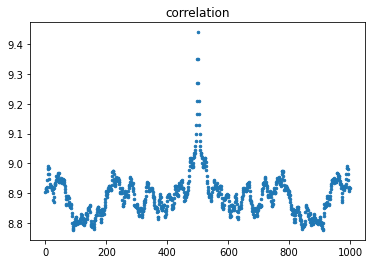

In [125]:
red_n=1000
red_xs=xs[::red_n]
plt.title('skimmed time series')
plt.plot(dt*red_n*np.arange(len(red_xs)),red_xs,'.',markersize=5)

corr=np.correlate(red_xs,red_xs,'side')
num=np.concatenate((np.arange(np.ceil(len(red_xs)/2),len(red_xs)+1),np.arange(np.ceil((len(red_xs)+1)/2),len(red_xs))[::-1]))
corr=corr/num

plt.figure()
plt.title('correlation')
plt.plot(corr,'.',markersize=5)



In [180]:
tau=1/alpha
print('autocorrelation time (analytical): ',tau)
print('corresponding n. of time steps: ',tau/dt)

autocorrelation time (analytical):  0.5
corresponding n. of time steps:  5000.0


3. Dirichlet

In [195]:
N=50
stepl=np.int(len(xs)/N)
M=2000

print('step length: ',stepl)

step length:  20000


In [196]:
gs=xs[::np.int(len(xs)/N)]
MC=np.random.dirichlet(np.ones(len(gs))/len(gs),size=M)
a=np.matmul(MC,gs)

[3.15314674 2.56671145 2.84845354 ... 4.36530499 2.54430369 2.77246933]


Text(0.5, 1.0, 'ensemble averages')

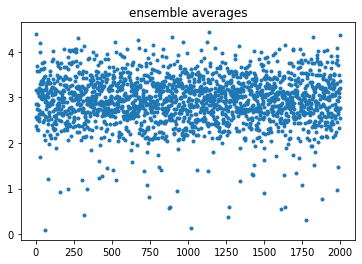

In [197]:
print(a)
plt.plot(a,'.')
plt.title('ensemble averages')
#plt.xlim([0,300])

#plt.figure()
#plt.plot(xs,gs,'.')

0.020572584209240526

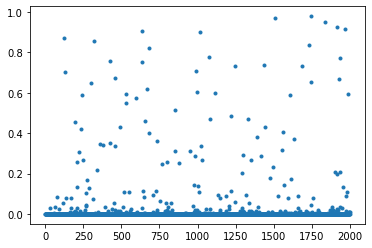

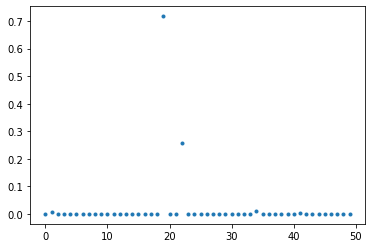

In [178]:
plt.plot(MC[:,np.random.randint(N)],'.')

plt.figure()
for i in range(1):
    plt.plot(MC[np.random.randint(M),:],'.',label=i)
#plt.legend()
#plt.yscale('log')
#plt.ylim([1e-3,1])

np.mean(MC[:,np.random.randint(N)])

In [179]:
av=np.mean(a)
av2=np.mean(a**2)
var=av2-av**2

print(av)
print('std: ',np.sqrt(var))

2.9273963088846706
std:  0.562643981108409


let's take weightsADE

In [43]:
userdoc=os.path.join(os.path.expanduser('~'),'1_project/initial_data')
w=np.loadtxt(os.path.join(userdoc,"weightsADE"),delimiter=',')

In [8]:
# tool to compute autocorrelation function of a time series using FFT
def autocorr(x):
    r2=np.fft.ifft(np.abs(np.fft.fft(x))**2).real
    c=(r2/x.shape-np.mean(x)**2)/np.std(x)**2
    return c[:len(x)//2]

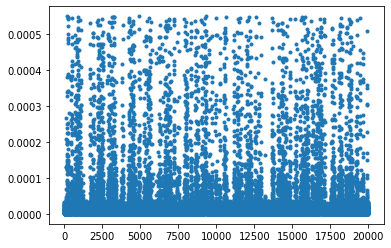

In [126]:
plt.plot(w,'.')
#plt.xlim([100,200])
#plt.yscale('log')

In [83]:
# Define the Gaussian function
def expo(x, tau, a, tau2, b):
    y = a*np.exp(-x/tau)+b*np.exp(-x/tau2)
    return y

[3.05759056e-02 7.34854082e-01 4.15618029e+01 2.65145918e-01] 
 [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


/u/i/igilardo/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/u/i/igilardo/.local/lib/python3.6/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


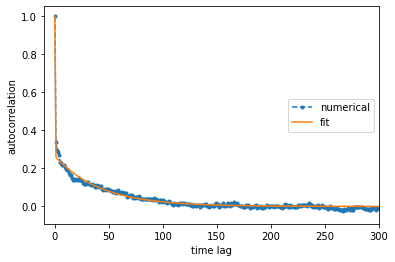

In [97]:
af=autocorr(w)
plt.plot(af,'.--',label="numerical")
x=np.arange(0,len(w)//2,1)#linspace(0.0,len(w)//2)

#plt.plot(x,np.exp(-x/10.0),'.--',label="analytical")
plt.xlabel("time lag")
plt.ylabel("autocorrelation")

plt.xlim([-10,300])

par,cov=curve_fit(expo,x,af)
print(par,'\n',cov)
  
fit_A = par[0]
  
fit_y = expo(x, par[0], par[1], par[2], par[3])
#plt.plot(bins[:-1], hist, '.', label='data')
plt.plot(x, fit_y, '-', label='fit')
#plt.xlim([-10,1000])
#plt.yscale('log')
plt.legend(loc='right')

In [58]:
sigma=np.std(w)/np.sqrt(len(w))
print(sigma)

6.937601488315599e-07


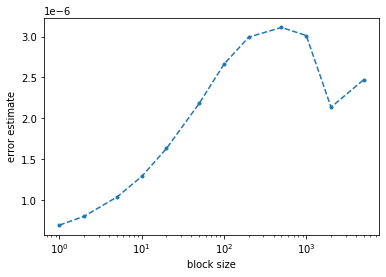

In [44]:
w=w[:-1]

block_sizes=(1,2,5,10,20,50,100,200,500,1000,2000,5000)
error=[]
for block_size in block_sizes:
    block_averages=(np.average(w.reshape((-1,block_size)),axis=1))
    error.append(np.std(block_averages)/np.sqrt(len(w)/block_size))
plt.plot(block_sizes,error,'.--')
plt.xscale("log")
plt.xlabel("block size")
plt.ylabel("error estimate")
plt.show()

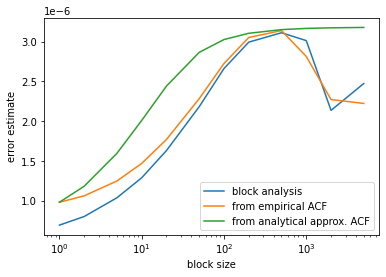

In [65]:
ac=autocorr(w)
errors1=[]
errors2=[]
for block_size in block_sizes:
    error1=np.sqrt(2*np.std(w)**2/len(w)*np.sum(ac[:block_size]*(1-np.arange(block_size)/block_size)))
    errors1.append(error1)
    error2=np.sqrt(2*np.std(w)**2/len(w)*np.sum(np.exp(-np.arange(block_size)/10)*(1-np.arange(block_size)/block_size)))
    errors2.append(error2)
plt.plot(block_sizes,error,label="block analysis")
plt.plot(block_sizes,errors1,label="from empirical ACF")
plt.plot(block_sizes,errors2,label="from analytical approx. ACF")
plt.xscale("log")
plt.xlabel("block size")
plt.ylabel("error estimate")
plt.legend()
plt.show()

2 autocorrelation times

In [147]:
mu=3
gamma1=1
gamma2=100
alpha=2

dt=1e-4

x0=3
xs1=[]
xs2=[]
xs3=[]

N=1000000
for i in range(N):
    dx=gamma1*(mu-x0)*dt+np.sqrt(2*gamma1*dt)*np.random.normal()#+np.sqrt(2*gamma2*dt)*np.random.normal()
    x0+=dx
    xs1.append(x0)

for i in range(N):
    dx=gamma2*(mu-x0)*dt+np.sqrt(2*gamma2*dt)*np.random.normal()#+np.sqrt(2*gamma2*dt)*np.random.normal()
    x0+=dx
    xs2.append(x0)

for i in range(N):
    dx=(gamma1+gamma2)*(mu-x0)*dt+np.sqrt(2*gamma1*dt)*np.random.normal()+np.sqrt(2*gamma2*dt)*np.random.normal()
    x0+=dx
    xs3.append(x0)

/u/i/igilardo/.local/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


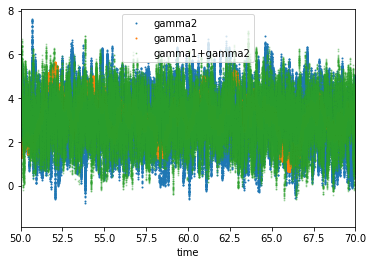

In [158]:
plt.plot(dt*np.arange(len(xs2)),xs2,'.',markersize=2,label='gamma2')
plt.plot(dt*np.arange(len(xs1)),xs1,'.',markersize=2,label='gamma1')
plt.plot(dt*np.arange(len(xs3)),xs3,'.',markersize=2,label='gamma1+gamma2')
plt.xlabel('time')
plt.xlim([50,70])
plt.legend()

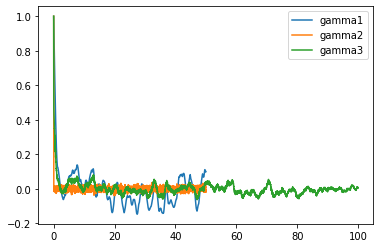

In [171]:
ac1=autocorr(np.array(xs1))
plt.plot(dt*np.arange(len(ac1)),ac1,label='gamma1')

ac2=autocorr(np.array(xs2))
plt.plot(dt*np.arange(len(ac2)),ac2,label='gamma2')

ac3=autocorr(np.array(xs1+xs2))
plt.plot(dt*np.arange(len(ac3)),ac3,label='gamma3')

plt.legend()

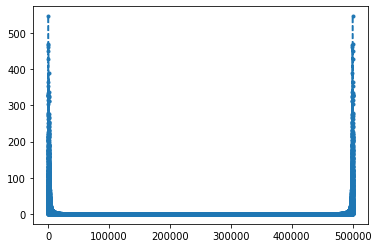

In [170]:
S1=np.fft.fft(ac2).real
plt.plot(S1,'.--')
